In [6]:
import boto3
import requests
import random
import numpy as np
import tempfile
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from IPython.display import Image, display, clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
@load_or_make()
def get_scores():
    scores = defaultdict(int)

In [7]:
s3 = boto3.resource('s3')
bucket_name = 'eye-of-the-needle'
bucket = s3.Bucket(bucket_name)
files = [file.key for file in bucket.objects.filter()]

In [28]:
scores_path = '../data/raw/scores.pkl'

@load_or_make(scores_path, overwrite='n')
def get_scores():
    scores = defaultdict(int)
    return scores
    
def label_imgs(n=4):
    scores = get_scores()
    inp = 1
    while inp != 'q':
        clear_output()
        fig = plt.figure(figsize=(35,15))
        n_files = random.sample(files, n)
        for i, file in enumerate(n_files):
            obj = bucket.Object(file)
            tmp = tempfile.NamedTemporaryFile()
            with open(tmp.name, 'wb') as f:
                obj.download_fileobj(f)
                img=mpimg.imread(tmp.name)
            ax = fig.add_subplot(n, 1, i + 1) 
            ax.imshow(img)
        plt.show()
        
        inp = input()
#         if inp != 'q':
        for i, image in enumerate(n_files):
            scores[image] += (str(i + 1) in inp)
        save_to(scores, scores_path)
        
    save_to(scores, '../data/raw/scores_backup.pkl')
    print(f'{sum(scores.values())} great photos out of {len(scores.keys())} photos scored')
    return scores

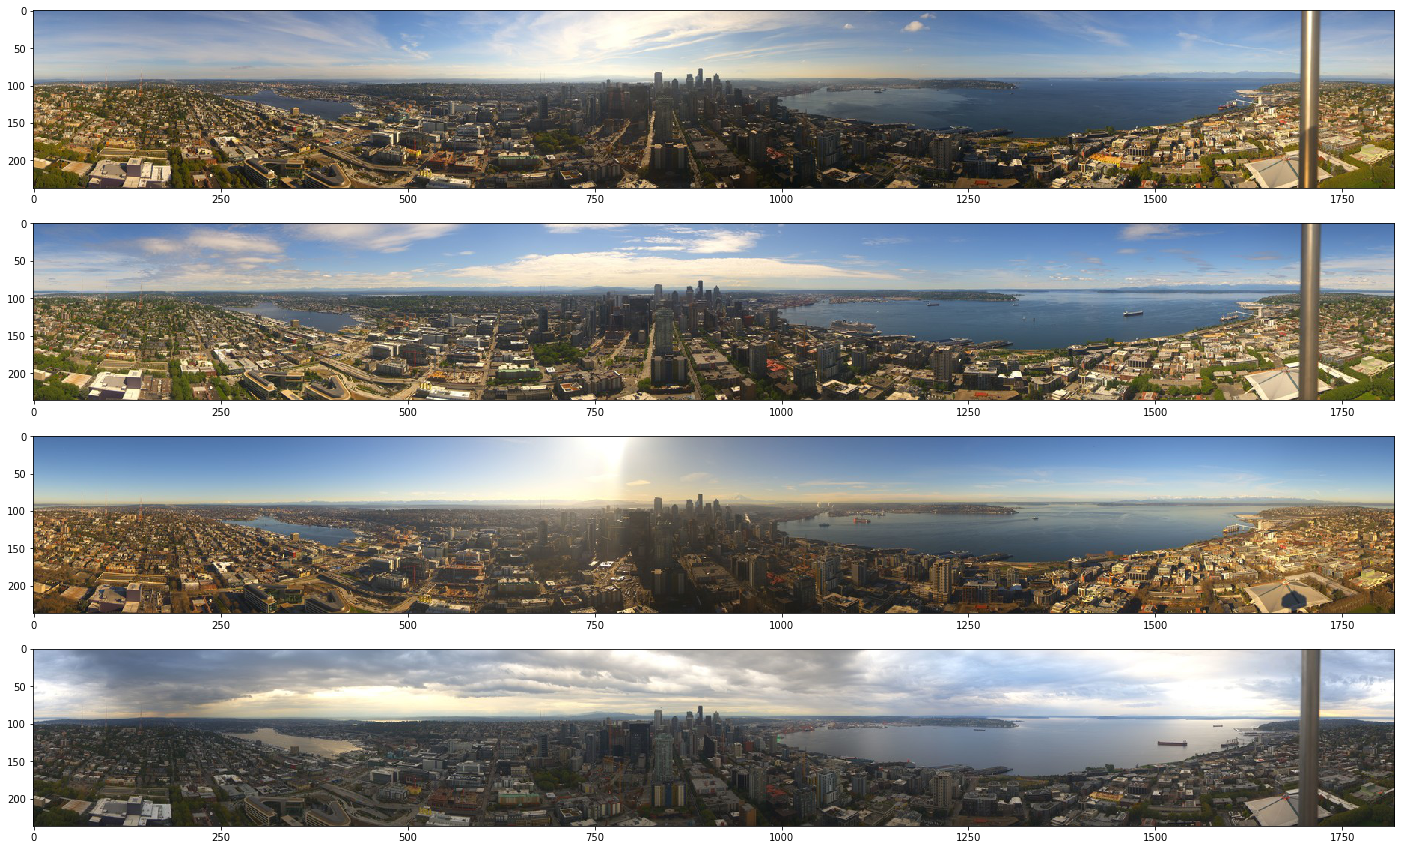

q
Saved file to ../data/raw/scores.pkl
Saved file to ../data/raw/scores_backup.pkl
33 great photos out of 172 photos scored


In [29]:
scores = label_imgs(4)

In [25]:
sum(scores.values())

8

In [20]:
str(3) in '124'

False

In [8]:
obj = files[0].get()
obj

{'ResponseMetadata': {'RequestId': 'F3B67D7A4A0E2CE7',
  'HostId': 'ZE21VNuRTxWdQaKkym3yg0QdbxaIWz9LMJ+WhwXle5ZetNB6X05WuBZMfiJ64i643vIUANBMb/o=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'ZE21VNuRTxWdQaKkym3yg0QdbxaIWz9LMJ+WhwXle5ZetNB6X05WuBZMfiJ64i643vIUANBMb/o=',
   'x-amz-request-id': 'F3B67D7A4A0E2CE7',
   'date': 'Fri, 31 May 2019 21:53:51 GMT',
   'last-modified': 'Fri, 31 May 2019 21:53:41 GMT',
   'etag': '"60daaa9c42c02ff1f03c164f03765dc9"',
   'accept-ranges': 'bytes',
   'content-type': 'binary/octet-stream',
   'content-length': '101753',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2019, 5, 31, 21, 53, 41, tzinfo=tzutc()),
 'ContentLength': 101753,
 'ETag': '"60daaa9c42c02ff1f03c164f03765dc9"',
 'ContentType': 'binary/octet-stream',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x7f1dae14bcf8>}

In [9]:

tmp = tempfile.NamedTemporaryFile()

with open(tmp.name, 'wb') as f:
    obj.download_fileobj(f)
    img=mpimg.imread(tmp.name)
    # ...Do jobs using img

AttributeError: 'dict' object has no attribute 'download_fileobj'

# Helpers

In [13]:
import os
import pickle

def load_or_make(filepath, overwrite='n'):
    def decorator(func):
        def wraps(*args, **kwargs):
            if overwrite == 'y':
                ow = input(f'Are you sure you want to overwrite {filepath}? y/n: ')
                if (os.path.exists(filepath)) and (ow == 'y'):
                    os.remove(filepath)
            try:
                with open(filepath, 'rb') as f:
                    data = pickle.load(f)
            except:
                data = func(*args, **kwargs)
                with open(filepath, 'wb') as to_write:
                    pickle.dump(data, to_write)
            return data
        return wraps
    return decorator


def save_to(item, filepath, verbose=True):
    """
    Pickles item sand saves it to path
    Input: object to be pickled, string containing directory and filename
    Output: pickled object stored to provided path
    """
    with open(filepath, 'wb') as to_write:
        pickle.dump(item, to_write, protocol=2)
    if verbose:
        print(f'Saved file to {filepath}')
    return


def load_from(filepath, verbose=True):
    """
    Unpickles item and returns item from path
    Input: filepath to pickled object
    Output: unpickled object
    """
    if not file_exists(filepath):
        print(f'Failed to load from {filepath}. Does not exist.')
    with open(filepath, 'rb') as f:
        item = pickle.load(f)
    if verbose:
        print(f'Loaded file from {filepath}')
    return item


def file_exists(filepath):
    """
    Returns True if specified file already exists, else False
    Input:
        path (str), path to directory containing file
        filename (str), name of file to check for
    Output: True if specified file already exists, else False
    """
    file_exists = os.path.isfile(filepath)
    return file_exists

